# Trabalho Prático A de Programação de Computadores - **MANCHAS SOLARES**.
## Por Gabriel Ribeiro (TM1) - UFMG, 2023.

### Uma breve introdução às manchas:

Manchas solares, ou _Sunspots_ - como são chamadas em inglês, são regiões mais escuras da superfície solar. Elas ocorrem, pois o sol possui moléculas gasosas super-carregadas eletricamente, cujo movimento constante resulta em perturbações extremas no campo eletromagnético da estrela. Essas perturbações, quando muito fortes, fazem com que o campo prenda o calor solar, criando Manchas Solares na superfície, regiões menos quentes que sua vizinhança. 
Mais cientificamente, explica a NASA:

> Sunspots:  One interesting aspect of the Sun is its sunspots.  Sunspots are areas where the magnetic field is about 2,500 times stronger than Earth's, much higher than anywhere else on the Sun.  Because of the strong magnetic field, the magnetic pressure increases while the surrounding atmospheric pressure decreases.  This in turn lowers the temperature relative to its surroundings because the concentrated magnetic field inhibits the flow of hot, new gas from the Sun's interior to the surface. 

> Manchas solares: Um aspecto interessante do Sol são suas manchas. Manchas solares são áreas onde o campo magnético é quase 2,500 vezes mais forte que o da Terra, mais forte ainda que em qualquer outro lugar do Sol. Devido ao forte campo magnético, a pressão magnética aumenta enquanto a pressão atmosférica ao redor diminui. Isso diminui a temperatura relativa à sua vizinhança porque a concentração do campo magnético impede o fluxo de novo gás quente do interior do Sol à superfície.

O número de manchas solares é importante, pois define o quão profundo no ciclo solar estamos. A queda, ascensão e nova queda no número de manchas implica entrada e saída de um novo ciclo. Desde que começaram a ser estudados, em 1749, no Observatório de Zurique na Suíça, a humanidade já atravessou 23 ciclos solares, estando agora no 24.º. Além disso, há teorias e evidências científicas que implicam, fortemente, relações entre a atividade solar e o clima do planeta Terra. Por exemplo, entre 1645 e 1715, período conhecido como Pequena Era do Gelo para algumas partes do globo, é conhecido, no campo de pesquisas solares, de Mínimo de Maunder (_Maunder Minimum_). Outrora, em períodos de máximos solares, há um pequeno aumento na energia liberada pelo sol. Mesmo que isso não afete fortemente o planeta, o número de raios ultravioleta emitidos cresce bastante, resultando em uma alteração na mecânica da atmosfera terrestre. Não somente, nos períodos de máximas, o número de ejeções de massa solar cresce, devido à forte presença do campo eletromagnético na superfície, esses _Solar Flares_ resultam em um lançamento massivo de raios-x e campos eletromagnéticos, causando uma tempestade geomagnética no planeta Terra, gerando um aumento em Auroras Boreais, perturbações de rádio e na matriz elétrica humana. 

###### Fontes: https://www.weather.gov/fsd/sunspots#:~:text=Sunspots%20are%20areas%20where%20the,the%20surrounding%20atmospheric%20pressure%20decreases ; https://spaceplace.nasa.gov/solar-activity/en/


### Objetivos:

Este trabalho tem como objetivo fazer uma amadora análise do número de manchas solares no decorrer do tempo, usando da linguagem Python e com algumas bibliotecas, como Datetime e Matplotlib, para auxiliar nas células de dados.

### Execuções:

A única base de dados utilizada nesta análise são os dados diários de manchas solares da SilSo (https://www.sidc.be/SILSO/datafiles). Essa escolha foi feita devido à ausência de consistência nos dados. Mesmo ambas as tabelas apresentando valores definitivos, quando analizadas lado a lado, algumas inconsistências - como, por exemplo, diferença em quantidades de manchas solares por ano - foram encontradas. Tanto é que, em primeiro plano, a ideia de meu trabalho era expor isso e conseguir assumir e deduzir ainda mais informações sobre os dados coletados pela SilSo. No entanto, isto se provou bastante complicado, pois há uma base de dados grande para ser analisada e também devido aos tratamentos de entrada para cada base de dados para contato com usuário. 
Originalmente, este trabalho possuía 3 pivôs de dados, com todas as suas sub-informações disponíveis no site da SilSo: TSN - Total Sunspot Number -, HSN - Hemispheric Sunspot Number -, DESN - Daily Estimated Sunspot Number. Devido à falta de tempo, para não entregar meio-trabalho, reduzi à TSN - Diário, para, também, fugir de inconsistências conclusíveis.

Além disso, tomei para mim outra modificação: o tratamento dos dados não é realizado por meio de dicionários. Optei por utilizar matrizes. Isto, pois a presença da base de dados bem documentada auxilia. Além disso, a matriz (_array_) permitiria trabalhar com um número maior de ferramentas, como àquelas disponíveis por Pandas, caso fosse preciso.
O tratamento da tabela em .csv (_comma separated value_) é feita na pasta Total_sunspot_number, com o módulo base_de_dados_TSN. Este cria algumas variáveis globais de análise que seriam utilizadas para compor toda a análise da parte TSN, mas está sendo utilizada apenas <dados_diarios_TSN>, como já foi previamente justificado.

O trabalho, agora, possui uma célula para auxiliar no tratamento de entrada e outras 8 funções para manipulação de dados. Todas as quais serão devidamente explicadas. No final, há uma função de interface, que culmina tudo que há no programa.

#### Função verificacao_de_data():

A ideia desta função é fazer o tratamento de dados para quando o usuário for inserir algo. Eu vi a necessidade de uma função geral para realizar isso, para facilitar e diminuir a complexidade do código na célula do menu do usuário. A função possui 4 argumentos (todos strings):
- data : é aqui que vai o _input_ do usuário
- tipo : avalia como deve ser o formato de data, pode ser de 3 maneiras
    - dd/mm/yyyy
    - mm/yyyy
    - yyyy
- intervalo_limite_inicio e intervalo_limite_fim : são **sempre** da forma dd/mm/yyyy e definem o intervalo no qual o argumento data deve pertencer. 

Vale ressaltar que esta função não foi feita para ser interagida com o usuário, por isso ela não possui formatação de entrada para seus argumentos, caso estes sejam inválidos. Ademais, nenhuma função fora de menu() possui verificação de entrada. Esta é feita somente em menu(), onde o contato com o usuário é o foco.

Acredito que as _if-clauses_ dentro da função sejam autoexplicativas, devido à mensagem printada em cada caso. Para simplificar o processo, a função sempre chama a si mesmo para verificar cada re-entrada.
Seu _return_ é a data, como string, corrigida, caso ela precise.
Datetime é utilizado para auxiliar na comparação de dados.

In [2]:
import datetime

In [3]:
def verificacao_de_data(data: str, tipo: str, intervalo_limite_inicio: str, intervalo_limite_fim: str) -> str:
    """
    Função que analisa o input de dados e verifica se está válido, fazendo os devidos  ajustes.
    As formatações de datas aceitas, em <tipo> são:
    --- dd/mm/yyyy
    --- mm/yyyy
    --- yyyy
    
    :param data: É a data para o qual se quer analisar e formatar a entrada.
    :param tipo: O tipo de formatação desejada.
    :param intervalo_limite_inicio: Define a partir de que data será aceita. (Intervalo Fechado). SEMPRE da forma: dd/mm/yyyy
    :param intervalo_limite_fim: Define até que data será aceita. (Intervalo fechado). SEMPRE da forma dd/mm/yyyy
    :return: Retorna a data formatada, corrigida, pronta para ser utilizada por outras funções.
    """
    
    dia_inicio, mes_inicio, ano_inicio = intervalo_limite_inicio.split('/')
    dia_final, mes_final, ano_final = intervalo_limite_fim.split('/')
    
    
    if data.isalpha():
        data = input('A data que você inseriu é alfabética. Isto é, inválida.'
                     f'\nPara continuar, precisamos que você insira uma data no formato: {tipo}.\n'
                     f'>>> INSIRA A DATA:')
        verificacao_de_data(data, tipo, intervalo_limite_inicio, intervalo_limite_fim)
        
    else:
        if tipo == 'dd/mm/yyyy':  
            if len(data) == 10 and data[2] != data[5] != data[7] != '/':
                data = input('A data que você inseriu não condiz com o tipo que é preciso para esta célula.\n'
                             f'Para continuar, precisamos que você insira uma data no formato: {tipo}.\n'
                             f'>>> INSIRA A DATA: ')
                verificacao_de_data(data, tipo, intervalo_limite_inicio, intervalo_limite_fim)
                
            elif len(data) != 10:
                data = input('A data que você inseriu não condiz com o tipo que é preciso para esta célula.\n'
                             f'Para continuar, precisamos que você insira uma data no formato: {tipo}.\n'
                             f'>>> INSIRA A DATA: ')
                verificacao_de_data(data, tipo, intervalo_limite_inicio, intervalo_limite_fim)
                
            else:
                dia, mes, ano = data.split('/')
                
                if not datetime.datetime(int(ano_inicio), int(mes_inicio), int(dia_inicio)) <= datetime.datetime(int(ano), int(mes), int(dia)) <= datetime.datetime(int(ano_final), int(mes_final), int(dia_final)):
                    data = input('A data que você inseriu está fora do intervalo aceito.\n'
                                 f'Para continuar, precisamos que você insira um ano entre {intervalo_limite_inicio} - {intervalo_limite_fim}.\n'
                                 f'>>> INSIRA A DATA: ')
                    verificacao_de_data(data, tipo, intervalo_limite_inicio, intervalo_limite_fim)
                    
                
        elif tipo == 'mm/yyyy':
            if len(data) == 7 and data[2] != '/':
                data = input('A data que você inseriu não condiz com o tipo que é preciso para esta célula.\n'
                             f'Para continuar, precisamos que você insira uma data no formato: {tipo}.\n'
                             f'>>> INSIRA A DATA: ')
                verificacao_de_data(data, tipo, intervalo_limite_inicio, intervalo_limite_fim)
            elif len(data) != 7:
                data = input('A data que você inseriu não condiz com o tipo que é preciso para esta célula.\n'
                             f'Para continuar, precisamos que você insira uma data no formato: {tipo}.\n'
                             f'>>> INSIRA A DATA: ')
                verificacao_de_data(data, tipo, intervalo_limite_inicio, intervalo_limite_fim)
                
            else:
                
                mes, ano = data.split('/')
                
                if not datetime.datetime(int(ano_inicio), int(mes_inicio), int(dia_inicio)) <= datetime.datetime(int(ano), int(mes), 1) <= datetime.datetime(int(ano_final), int(mes_final), int(dia_final)):
                    data = input('A data que você inseriu está fora do intervalo aceito.\n'
                                 f'Para continuar, precisamos que você insira um ano entre {intervalo_limite_inicio} - {intervalo_limite_fim}.\n'
                                 f'>>> INSIRA A DATA: ')
                    verificacao_de_data(data, tipo, intervalo_limite_inicio, intervalo_limite_fim)
                    
        elif tipo == 'yyyy':
            if len(data) != 4:
                data = input('A data que você inseriu não condiz com o tipo que é preciso para esta célula.\n'
                             f'Para continuar, precisamos que você insira um ano no formato: {tipo}.\n'
                             f'>>> INSIRA A DATA: ')
                verificacao_de_data(data, tipo, intervalo_limite_inicio, intervalo_limite_fim)
            
            else: 
                if not datetime.datetime(int(ano_inicio), int(mes_inicio), int(dia_inicio)) <= datetime.datetime(int(data), 1, 1) <= datetime.datetime(int(ano_final), int(mes_final), int(dia_final)):
                    data = input('A data que você inseriu está fora do intervalo aceito.\n'
                                 f'Para continuar, precisamos que você insira um ano entre {intervalo_limite_inicio} - {intervalo_limite_fim}.\n'
                                 f'>>> INSIRA A DATA: ')
                    verificacao_de_data(data, tipo, intervalo_limite_inicio, intervalo_limite_fim)
    
    return data

Abaixo, segue um exemplo de execução:

In [4]:
verificacao_de_data(data='05/2023',tipo='yyyy', intervalo_limite_inicio='01/01/1818', intervalo_limite_fim='31/10/2023')

'2005'

#### Importação de dados

Aqui ocorre a importação de dados e uma exposição de como eles estão organizados. Caso aqui não seja suficiente, as ferramentas de análise e formatação da base de dados estão no arquivo do módulo base_de_dados_TSN.
Resumidamente, TSN_dados_diarios é uma lista de listas de tuplas - list[list[tuple]].

#### Missing Values

No decorrer do código, _missing values_, (-1), serão computados como 0.

In [5]:
from Total_sunspot_number import base_de_dados_TSN

In [6]:
print(base_de_dados_TSN.TSN_dados_diarios[1900 - 1818])

[(1900, 1, 1, 1900.001, 12, 3.0, 1, 1), (1900, 1, 2, 1900.004, 12, 3.0, 1, 1), (1900, 1, 3, 1900.007, 3, 2.0, 1, 1), (1900, 1, 4, 1900.01, 0, 2.0, 1, 1), (1900, 1, 5, 1900.012, 0, 2.0, 1, 1), (1900, 1, 6, 1900.015, 0, 2.0, 1, 1), (1900, 1, 7, 1900.018, 0, 2.0, 1, 1), (1900, 1, 8, 1900.021, 0, 2.0, 1, 1), (1900, 1, 9, 1900.023, 0, 2.0, 1, 1), (1900, 1, 10, 1900.026, 0, 2.0, 1, 1), (1900, 1, 11, 1900.029, 0, 2.0, 1, 1), (1900, 1, 12, 1900.032, 22, 4.2, 1, 1), (1900, 1, 13, 1900.034, 52, 6.4, 1, 1), (1900, 1, 14, 1900.037, 45, 6.0, 1, 1), (1900, 1, 15, 1900.04, 27, 4.6, 1, 1), (1900, 1, 16, 1900.042, 38, 5.5, 1, 1), (1900, 1, 17, 1900.045, 22, 4.2, 1, 1), (1900, 1, 18, 1900.048, 15, 3.5, 1, 1), (1900, 1, 19, 1900.051, 12, 3.0, 1, 1), (1900, 1, 20, 1900.053, 12, 3.0, 1, 1), (1900, 1, 21, 1900.056, 0, 2.0, 1, 1), (1900, 1, 22, 1900.059, 0, 2.0, 1, 1), (1900, 1, 23, 1900.062, 12, 3.0, 1, 1), (1900, 1, 24, 1900.064, 17, 3.6, 1, 1), (1900, 1, 25, 1900.067, 20, 4.0, 1, 1), (1900, 1, 26, 1900.07

#### Início das observações:

Note que, para TSN Diário, o início das observações é 01/01/1818, o final é 31/10/2023.
Dada a forma com que o dado é formatado, sabemos que, como há a divisão de dados de mesmo ano, para pegarmos uma lista de um ano XXXX, usamos o índice [XXXX - 1818].

####  Função dias_sem_manchas():

Essa função recebe um único argumento, isto é: o ano para o qual se verificar quais foram os dias que não se tiveram manchas solares.
O _return_ dessa função é _None_, pois seu _output_ é idealizado para ser um _print upon calling_ de uma tabela com as informações desejadas.

In [7]:
def dias_sem_manchas(ano: int) -> None:
    """
    A função conta quantos dias, por mês, não houve manchas solares. A base de dados utilizada é TSN diário.
    
    :param ano: Ano para o qual se quer fazer a contagem dos dados
    :return: Por enquanto, retorna None, pois dá print upon calling.
    """
    
    # Os dados em TSN Diário começa em 1818, logo, em base_de_dados_TSN.TSN_dados_diarios pegaremos as informações do ano que queremos usando o índice [ano - 1818]
    
    tabela = '| Ano  | Mês  | Dia(s) sem manchas |'
    
    contador_total = 0
    contador_mes = 0
    for i, tupla in enumerate(base_de_dados_TSN.TSN_dados_diarios[ano - 1818]):
            
        ano, mes, dia, frac_ano, obsv, desv_p, observacoes, def_prov = tupla
        
        if i == 0:
            mes_analizado = mes
        
        if obsv == 0 and mes == mes_analizado:
            tabela += f'\n| {ano} |  ' + (f'{mes}  |         ' if mes >= 10 else '0' + f'{mes}  |         ') + (f'{dia}         |' if dia >= 10 else '0' + f'{dia}         |')
            contador_mes += 1
            contador_total += 1
            
        if ((obsv == 0 and mes != mes_analizado) or i == len(base_de_dados_TSN.TSN_dados_diarios[ano - 1818]) - 1) and contador_mes > 0:
            tabela += '\n' + ('-' * 36) + f'\nDias sem manchas para {mes_analizado}/{ano}: {contador_mes}\n' + ('-' * 36)
            
            if i < len(base_de_dados_TSN.TSN_dados_diarios[ano - 1818]) - 1:
                tabela += '\n| Ano  | Mês  | Dia(s) sem manchas |'
                tabela += f'\n| {ano} |  ' + (f'{mes}  |         ' if mes >= 10 else '0' + f'{mes}  |         ') + (f'{dia}         |' if dia >= 10 else '0' + f'{dia}         |')
                contador_total += 1
                 
            contador_mes = 0; contador_mes += 1
            mes_analizado = mes
            
    tabela += '\n' + ('-' * 36) + f'\nTotal de dias sem manchas em {ano}: {contador_total}\n' + ('-' * 36)
    
    print(tabela)
    return None

Segue um exemplo de execução:

In [8]:
dias_sem_manchas(1964)

| Ano  | Mês  | Dia(s) sem manchas |
| 1964 |  01  |         01         |
------------------------------------
Dias sem manchas para 1/1964: 1
------------------------------------
| Ano  | Mês  | Dia(s) sem manchas |
| 1964 |  02  |         01         |
| 1964 |  02  |         02         |
| 1964 |  02  |         03         |
| 1964 |  02  |         04         |
| 1964 |  02  |         05         |
| 1964 |  02  |         06         |
| 1964 |  02  |         12         |
| 1964 |  02  |         13         |
------------------------------------
Dias sem manchas para 2/1964: 8
------------------------------------
| Ano  | Mês  | Dia(s) sem manchas |
| 1964 |  03  |         06         |
| 1964 |  03  |         10         |
------------------------------------
Dias sem manchas para 3/1964: 2
------------------------------------
| Ano  | Mês  | Dia(s) sem manchas |
| 1964 |  04  |         02         |
| 1964 |  04  |         04         |
| 1964 |  04  |         19         |
| 1964 |  04  | 

#### Função mes_ano_mais_manchas():

Essa função não recebe argumentos pois ela percorre toda a base de dados, fazendo a contagem das manchas, para determinar qual mês e qual ano tiveram o maior número de manchas solares.
Similarmente à anterior, esta também retorna _None_, pois realiza _print upon calling_ de uma _string_ de resultados.

In [9]:
def mes_ano_mais_manchas() -> None:
    """
    Essa função determina qual mês e qual ano tiveram o maior número de manchas solares. A base de dados utilizada é TSN diário.
    
    :return: None, pois printa os resultados "upon calling". 
    """
    
    maior_obsv_mes = -1
    maior_obsv_ano = -1
    maior_mes = str()
    maior_ano = str()
    
    for i, tuplas_m_ano in enumerate(base_de_dados_TSN.TSN_dados_diarios):
        
        obsv_mes = 0
        obsv_ano = 0
        for j, tupla in enumerate(tuplas_m_ano):
            
            ano, mes, dia, frac_ano, obsv, desv_p, observacoes, def_prov = tupla

            if j == 0:
                mes_analizado = 1
            
            if mes == mes_analizado and obsv != -1: # pois -1 é missing value
                obsv_mes += obsv
            
            if (mes != mes_analizado or j == len(tuplas_m_ano) - 1) and obsv != -1:
                if obsv_mes > maior_obsv_mes:
                    maior_obsv_mes = obsv_mes
                    maior_mes = f'O mês com mais manchas solares foi: {mes_analizado}/{ano}, com um total de {maior_obsv_mes}.'
                
                obsv_ano += obsv_mes
                obsv_mes = 0; obsv_mes += obsv
                mes_analizado = mes
                    
                    
        if obsv_ano > maior_obsv_ano:
            maior_obsv_ano = obsv_ano
            
            maior_ano = f'O ano com mais manchas solares foi: {ano}, com um total de {maior_obsv_ano}.'
            
            
    print(maior_mes, maior_ano)
    return None
                    

Segue a execução:

In [10]:
mes_ano_mais_manchas()

O mês com mais manchas solares foi: 10/1957, com um total de 11141. O ano com mais manchas solares foi: 1957, com um total de 98292.


#### Função mes_ano_mais_sem_manchas():

Funciona completamente análoga à anterior, mas esta retorna o mês e o ano que mais tiveram dias sem manchas solares.

In [11]:
def mes_ano_mais_sem_manchas() -> None:
    """
    Essa função retorna o mês e o ano que mais tiveram dias sem manchas solares. A base de dados utilizada é TSN Diário.
    Missing Values não são contabilizados como ausência de manchas.
    
    :return: None, printa o resultado upon calling.
    """
    
    '''
    O código é análogo ao da célula anterior.
    '''
    
    ano_mais_sem_manchas = str()
    mes_mais_sem_manchas = str()
    maior_ano_sem_manchas = -1
    maior_mes_sem_manchas = -1
    mesmo_ano = list()
    mesmo_mes = list()
    mesmo_ano_str = ''
    mesmo_mes_str = ''
    
    for i, tuplas_m_ano in enumerate(base_de_dados_TSN.TSN_dados_diarios):
        
        contador_mes = 0
        contador_ano = 0
        for j, tupla in enumerate(tuplas_m_ano):
            
            ano, mes, dia, frac_ano, obsv, desv_p, observacoes, def_prov = tupla
            
            if j == 0:
                mes_analizado = mes
            
            if mes_analizado == mes and obsv == 0:
                contador_mes += 1
                
            if (mes_analizado != mes or j == len(tuplas_m_ano) - 1) and obsv == 0:
                if contador_mes > maior_mes_sem_manchas: 
                    maior_mes_sem_manchas = contador_mes
                    mes_mais_sem_manchas = f'O mês com mais dias sem manchas solares foi: {mes_analizado}/{ano}, com um total de {maior_mes_sem_manchas}.'
                elif contador_mes == maior_mes_sem_manchas:
                    mesmo_mes_str = f'Assim como: '
                    mesmo_mes += [f'{mes_analizado}/{ano}']
                    
                contador_ano += contador_mes
                contador_mes = 0; contador_mes += 1
                mes_analizado = mes
                
        if contador_ano > maior_ano_sem_manchas:
            maior_ano_sem_manchas = contador_ano
            ano_mais_sem_manchas = f'O ano com mais dias sem manchas solares foi: {ano}, com um total de {maior_ano_sem_manchas}.'
        elif contador_ano == maior_ano_sem_manchas:
            mesmo_ano_str = 'Assim como: '
            mesmo_ano += [ano]
            
    print(ano_mais_sem_manchas)
    if len(mesmo_ano) > 0:
        for i, item in enumerate(mesmo_ano):
            mesmo_ano_str += item + (', ' if i < len(mesmo_ano) - 1 else '')
        print(mesmo_ano_str)
    print(mes_mais_sem_manchas)
    if len(mesmo_mes) > 0:
        for i, item in enumerate(mesmo_mes):
            mesmo_mes_str += item + (', ' if i < len(mesmo_mes) - 1 else '')
        print(mesmo_mes_str)
    return None


Segue a execução:

In [12]:
mes_ano_mais_sem_manchas()

O ano com mais dias sem manchas solares foi: 1822, com um total de 295.
O mês com mais dias sem manchas solares foi: 1/1822, com um total de 31.
Assim como: 1/1823, 5/1856, 1/1867, 8/1878, 3/1879, 12/1901, 5/1913, 8/2009


#### Funçao max_min_periodo():

Essa função calcula a maior e menor quantidade de manchas solares observadas, dentro do período inserido como argumento, para os dias, meses e anos. Ela também retorna _None_, pois realiza _print upon calling_.

In [13]:
def max_min_periodo(ini: str, fim: str) -> None:
    """
    Dado um período, calcula a maior e menor quantidade de manchas solares (dia, mes, ano), para o determinado período. A base de dados utilizada será TSN Diário.
    
    :param ini: 
    :param fim: 
    :return: 
    """
    
    max_obsv_mes = -1
    max_obsv_ano = -1
    max_mes = str()
    max_ano = str()
    
    min_obsv_mes = int()
    min_obsv_ano = int()
    min_ano = str()
    min_mes = str()
    
    min_obsv_dia = int()
    min_dia = int()
    max_obsv_dia = int()
    max_dia = str()
    
    
    indices_d1 = ini.split('/')
    indices_d2 = fim.split('/')
    
    d_i = datetime.datetime(int(indices_d1[2]), int(indices_d1[1]), int(indices_d1[0]))
    d_f = datetime.datetime(int(indices_d2[2]), int(indices_d2[1]), int(indices_d2[0]))
    
    for i, tuplas_m_ano in enumerate(base_de_dados_TSN.TSN_dados_diarios):
        
        obsv_mes = 0
        obsv_ano = 0
        for j, tupla in enumerate(tuplas_m_ano):
            
            ano, mes, dia, frac_ano, obsv, desv_p, observacoes, def_prov = tupla
            
            d = datetime.datetime(ano, mes, dia)
            
            if d_i <= d <= d_f:
                
                if d == d_i:
                    mes_analizado = int(indices_d1[1])
                    
                    if obsv != -1:
                        
                        max_obsv_dia = obsv
                        min_obsv_dia = obsv
                    
                if obsv > max_obsv_dia:
                    max_obsv_dia = obsv
                    max_dia = f'O dia com mais manchas solares, entre {ini} e {fim}, foi: {dia}/{mes}/{ano}, com um total de {max_obsv_dia}.'
                
                elif obsv < min_obsv_dia and obsv != -1:
                    min_obsv_dia = obsv
                    min_dia = f'O dia com menos manchas solares, entre {ini} e {fim}, foi: {dia}/{mes}/{ano}, com um total de {min_obsv_dia}.'
            
                if mes == mes_analizado and obsv != -1: # pois -1 é missing value
                    obsv_mes += obsv
                
                if (mes != mes_analizado or j == len(tuplas_m_ano) - 1) and obsv != -1:
                    
                    if j == 0 and mes_analizado == 1:
                        max_obsv_mes = obsv_mes
                        min_obsv_mes = obsv_mes
                    
                    if obsv_mes > max_obsv_mes:
                        max_obsv_mes = obsv_mes
                        max_mes = f'O mês com mais manchas solares foi: {mes_analizado}/{ano}, com um total de {max_obsv_mes}.'
                        
                    elif obsv_mes < min_obsv_mes:
                        min_obsv_mes = obsv_mes
                        min_mes = f'O mês com menos manchas solares, entre {ini} e {fim}, foi: {mes_analizado}/{ano}, com um total de {min_obsv_mes}.'
                
                    obsv_ano += obsv_mes
                    obsv_mes = 0; obsv_mes += obsv
                    mes_analizado = mes
                   
            if i == 0:
                max_obsv_ano = obsv_ano
                min_obsv_ano = obsv_ano
            
            else:
                if obsv_ano > max_obsv_ano:
                    max_obsv_ano = obsv_ano
                
                    max_ano = f'O ano com mais manchas solares, entre {ini} e {fim}, foi: {ano}, com um total de {max_obsv_ano}.'
                
                elif obsv_ano < min_obsv_ano:
                    min_obsv_ano = obsv_ano
                
                    min_ano = max_ano = f'O ano com menos manchas solares, entre {ini} e {fim}, foi: {ano}, com um total de {min_obsv_ano}.'
            
    print(max_ano, max_mes, max_dia, min_ano, min_mes, min_dia)
    return None


Segue um exemplo de funcionalidade:

In [14]:
max_min_periodo('24/12/2003', '27/12/2006')

O ano com mais manchas solares, entre 24/12/2003 e 27/12/2006, foi: 2004, com um total de 23913. O mês com mais manchas solares foi: 7/2004, com um total de 2599. O dia com mais manchas solares, entre 24/12/2003 e 27/12/2006, foi: 4/7/2005, com um total de 167.   O dia com menos manchas solares, entre 24/12/2003 e 27/12/2006, foi: 27/1/2004, com um total de 0.


Podemos usar essa função para verificar alguns resultados anteriores, como ano e mês com mais manchas.

In [15]:
max_min_periodo('01/01/1818', '30/10/2023')

O ano com mais manchas solares, entre 01/01/1818 e 30/10/2023, foi: 1957, com um total de 98292. O mês com mais manchas solares foi: 10/1957, com um total de 11141. O dia com mais manchas solares, entre 01/01/1818 e 30/10/2023, foi: 26/8/1870, com um total de 528. O ano com menos manchas solares, entre 01/01/1818 e 30/10/2023, foi: 1819, com um total de 0.  0


#### Função media_mensal():

Calcula a média de ocorrência de manchas dos meses para os meses do dado ano inserido como argumento.
Desta vez, ela retorna uma lista contendo tuplas com as médias e dados para a identificação.

In [16]:
def media_mensal(ano) -> list[tuple]:
    """
    Calcula a média mensal de ocorrências de manchas solares, para um dado ano. A base de dados utilizada é TSN Diário.
    IMPORTANTE: Missing Values serão computados como ausência de manchas (zero).
    
    :param ano: Ano para o qual se deseja calcular a média mensal.
    :return: Uma lista que contém uma tupla contendo (ano, mes, média)
    """
    
    '''
    Esse cálculo é bastante similar às células anteriores.
    '''
    
    obsv_mes = 0
    n_dias = 0
    medias = list()
    for i, tuplas_m_ano in enumerate(base_de_dados_TSN.TSN_dados_diarios[ano - 1818]):
        
        ano, mes, dia, frac_ano, obsv, desv_p, observacoes, def_prov = tuplas_m_ano

        if i == 0:
            mes_analizado = 1
        
        if mes == mes_analizado:
            n_dias += 1
            if obsv != -1:
                obsv_mes += obsv
        
        if (mes != mes_analizado) or i == len(base_de_dados_TSN.TSN_dados_diarios[ano - 1818]) - 1:
            media = int((obsv_mes / n_dias) * 1000) / 1000
            medias += [(ano, mes_analizado, media)]
            
            mes_analizado = mes
            n_dias = 0; obsv_mes = 0
            n_dias += 1
            if obsv != -1:
                obsv_mes = obsv
        
    return medias

Segue um exemplo de funcionalidade:

In [17]:
media_mensal(2000)

[(2000, 1, 133.096),
 (2000, 2, 165.655),
 (2000, 3, 217.741),
 (2000, 4, 191.5),
 (2000, 5, 165.903),
 (2000, 6, 188.033),
 (2000, 7, 244.322),
 (2000, 8, 180.451),
 (2000, 9, 156.033),
 (2000, 10, 141.58),
 (2000, 11, 158.1),
 (2000, 12, 143.29)]

#### Função desv_p_mensal():

Esta função utiliza o método de cálculo de desvio padrão definido no próprio site da SilSo:
> Error values:
The monthly standard deviation of individual data is derived from the daily values by: sigma(m)=sqrt(SUM(N(d)*sigma(d)^2)/SUM(N(d)))
###### Fonte: https://www.sidc.be/SILSO/infosnmtot

A função calcula o desvio padrão de toda a base de dados. Retorna uma lista de lista de tuplas de mesmo ano - list[list[tuple]]. 

In [18]:
def desv_p_mensal() -> list[list[tuple]]:
    """
    Essa função calcula o desvio padrão de cada mês. Segundo o site da SilSo, a fórmula utilizada é:
        'The monthly standard deviation of individual data is derived from the daily values by: sigma(m)=sqrt(SUM(N(d)*sigma(d)^2)/SUM(N(d)))'
    
    O desvio padrão do dia já nos é dado na tabela de dados primária (TSN Diário) fornecido. Usaremos ele para aplicar à fórmula.
    Mas, em caso de interesse em como este é calculado, segue do site:
        The standard error of the daily Sunspot Number can be computed by:
        sigma/sqrt(N) where sigma is the listed standard deviation and N the number of observations for the day.
    
    Missing values serão contabilizados como zeros.
    
    :return: 
    """
    numerador = 0
    denominador = 0
    desvios_mensais_m_ano = list()
    desvios_mensais = list()
    
    for i, tuplas_m_ano in enumerate(base_de_dados_TSN.TSN_dados_diarios):
        
        for j, tupla in enumerate(tuplas_m_ano):
            
            ano, mes, dia, frac_ano, obsv, desv_p, observacoes, def_prov = tupla
            
            if j == 0:
                mes_analizado = 1
            
            if mes == mes_analizado and obsv != -1:
                numerador += (obsv * (desv_p ** 2))
                denominador += obsv
                    
            if (mes != mes_analizado and obsv != -1) or j == len(tuplas_m_ano) - 1:
                
                if denominador != 0:
                    desv_p_mensal = int(((numerador / denominador) ** (1/2)) * 1000) / 1000
                else:
                    desv_p_mensal = 0
                    
                desvios_mensais_m_ano += [(ano, mes_analizado, desv_p_mensal)]
                
                mes_analizado = mes
                numerador = 0; denominador = 0
                numerador += obsv * desv_p * desv_p
                denominador += obsv
        
        desvios_mensais += [desvios_mensais_m_ano]
        desvios_mensais_m_ano = list()
                
    return desvios_mensais

Segue a execução:

In [19]:
desv_p_mensal()

[[(1818, 1, 10.944),
  (1818, 2, 13.353),
  (1818, 3, 9.439),
  (1818, 4, 10.087),
  (1818, 5, 13.491),
  (1818, 6, 11.002),
  (1818, 7, 9.321),
  (1818, 8, 10.187),
  (1818, 9, 9.546),
  (1818, 10, 11.859),
  (1818, 11, 6.686),
  (1818, 12, 10.883)],
 [(1819, 1, 10.012),
  (1819, 2, 8.885),
  (1819, 3, 5.855),
  (1819, 4, 9.748),
  (1819, 5, 9.563),
  (1819, 6, 10.805),
  (1819, 7, 11.003),
  (1819, 8, 10.513),
  (1819, 9, 8.853),
  (1819, 10, 9.462),
  (1819, 11, 11.789),
  (1819, 12, 9.516)],
 [(1820, 1, 9.731),
  (1820, 2, 9.134),
  (1820, 3, 9.164),
  (1820, 4, 9.568),
  (1820, 5, 9.946),
  (1820, 6, 8.736),
  (1820, 7, 9.616),
  (1820, 8, 8.774),
  (1820, 9, 6.537),
  (1820, 10, 9.414),
  (1820, 11, 6.804),
  (1820, 12, 9.035)],
 [(1821, 1, 8.275),
  (1821, 2, 9.041),
  (1821, 3, 6.639),
  (1821, 4, 7.718),
  (1821, 5, 6.145),
  (1821, 6, 6.77),
  (1821, 7, 7.531),
  (1821, 8, 6.454),
  (1821, 9, 7.751),
  (1821, 10, 8.458),
  (1821, 11, 8.055),
  (1821, 12, 4.6)],
 [(1822, 1, 0)

#### Função media_suavizada_mensal_periodo():

Essa função utiliza de um método chamado Boxcar para suavizar a média. A fórmula para suavizar também está no site da Silso em:

> The 13-month smoothed monthly sunspot number is derived by a "tapered-boxcar" running mean of monthly sunspot numbers over 13 months centered on the corresponding month (Smoothing function: equal weights = 1, except for first and last elements (-6 and +6 months) = 0.5, Normalization by 1/12 factor). There are no smoothed values for the first 6 months and last 6 months of the data series: columns 4, 5 and 6 are set to -1 (no data).
###### Fonte: https://www.sidc.be/SILSO/infosnmstot

No entanto, há uma diferença entre o cálculo realizado pela SilSo e por este definido no programa. Os primeiros e últimos seis meses contém médida suavizada, para que não fique nenhum "vazio estatístico". Ele foi calculado considerando os valores que faltam como zero.


In [20]:
def media_suavizada_mensal_periodo(ano_inicial, ano_final) -> list[tuple]:
    """
    Dado um ano inicial e um final, calcula a média suavizada para os meses entre ambos os argumentos. A base de dados utilizada é TSN Diário.
    Missing values serão computados como ausência de manchas.
    O mês base que será usado para computar será o mês 6 de cada ano.
    A fórmula para calcular a média suavizada está no site da SilSo e é:
    Rs= (0.5 Rm-6 + Rm-5 + Rm-4 + Rm-3 + Rm-2 + Rm-1 + Rm + Rm+1 + Rm+2 + Rm+3 + Rm+4 + Rm+5 + 0.5 Rm+6 ) / 12
    
    :param ano_final: Ano inicial do período.
    :param ano_inicial: Ano final do período.
    :return: 
    """
    
    '''
    A média suavizada para um dado mês é a média dos 6 meses anteriores + o mês + os 6 próximos, no qual o sexto mês anterior e o sexto mês próximo recebem peso 0,5. Essa soma é dividida por 12, resultando na média suavizada para o mês. (tapared box car method)
    Vamos utilizar a função anterior para nos auxiliar.
    
    No entanto, para não gerar discrepâncias de cálculo, será feito o seguinte. Para os seis primeiros meses da base de dados (1818: 1-6) e os seis últimos (2023: 5-10), considerarão os meses que faltam como 0.
    '''
    
    medias_suavizadas = list()
    medias_mensais = list()
    
    if ano_inicial > 1818:
        s = 1
    else:
        s = 0
    if ano_final < 2023:
        t = 1
    else:
        t = 0
    # isso serve pois, se ano for maior que 1818, precisamos do ano anterior para calcular a média suavizada. mesmo para 2023, precisamos do próximo ano. assim, estamos gerando o ano anterior e posterior para conseguirmos calcular a média suavizada
    
    for ano in range(ano_inicial - s, ano_final + 1 + t): 
        medias_mensais += media_mensal(ano)
    
    if ano_inicial == ano_final == 2023:
    
        for ano, mes, media_mes in medias_mensais[(12 if s == 1 else 0):]:
        
            indice_tupla = medias_mensais.index((ano, mes, media_mes))
            
            media_suavizada = 0
            for i in range(1, 6 + 1):
                
                if i == 6:
                    media_suavizada += (medias_mensais[indice_tupla + i][-1] * 0.5 if (ano != 2023 and indice_tupla <= len(medias_mensais) - 5) else 0) + (medias_mensais[indice_tupla - 6][-1] * 0.5 if (ano != 1818 and indice_tupla <= 5) else 0) 
                else:
                    media_suavizada += (medias_mensais[indice_tupla + i][-1] * 0.5 if (ano != 2023 and indice_tupla <= len(medias_mensais) - 5) else 0) + (medias_mensais[indice_tupla - 6][-1] * 0.5 if (ano != 1818 and indice_tupla <= 5) else 0)
                    
            media_suavizada = int(media_suavizada * 1000 / 12) / 1000
            
            medias_suavizadas += [(ano, mes, media_suavizada)]
            
    else:
    
        for ano, mes, media_mes in medias_mensais[(12 if s == 1 else 0) : (-12 if t == 1 else -1)]:
        
            indice_tupla = medias_mensais.index((ano, mes, media_mes))
            
            media_suavizada = 0
            for i in range(1, 6 + 1):
                
                if i == 6:
                    media_suavizada += (medias_mensais[indice_tupla + i][-1] * 0.5 if (ano != 2023 and indice_tupla <= len(medias_mensais) - 5) else 0) + (medias_mensais[indice_tupla - 6][-1] * 0.5 if (ano != 1818 and indice_tupla <= 5) else 0) 
                else:
                    media_suavizada += (medias_mensais[indice_tupla + i][-1] * 0.5 if (ano != 2023 and indice_tupla <= len(medias_mensais) - 5) else 0) + (medias_mensais[indice_tupla - 6][-1] * 0.5 if (ano != 1818 and indice_tupla <= 5) else 0)
                    
            media_suavizada = int(media_suavizada * 1000 / 12) / 1000
            
            medias_suavizadas += [(ano, mes, media_suavizada)]
        
    return medias_suavizadas

Segue algumas execuções:

In [21]:
media_suavizada_mensal_periodo(2023, 2023)

[(2023, 1, 0.0),
 (2023, 2, 0.0),
 (2023, 3, 0.0),
 (2023, 4, 0.0),
 (2023, 5, 0.0),
 (2023, 6, 0.0),
 (2023, 7, 0.0),
 (2023, 8, 0.0),
 (2023, 9, 0.0),
 (2023, 10, 0.0)]

In [22]:
media_suavizada_mensal_periodo(1818, 2023)

[(1818, 1, 9.658),
 (1818, 2, 10.291),
 (1818, 3, 10.579),
 (1818, 4, 10.461),
 (1818, 5, 7.794),
 (1818, 6, 6.434),
 (1818, 7, 5.996),
 (1818, 8, 5.098),
 (1818, 9, 4.207),
 (1818, 10, 3.724),
 (1818, 11, 4.778),
 (1818, 12, 5.887),
 (1819, 1, 6.063),
 (1819, 2, 6.95),
 (1819, 3, 7.687),
 (1819, 4, 7.967),
 (1819, 5, 7.711),
 (1819, 6, 7.218),
 (1819, 7, 6.978),
 (1819, 8, 6.468),
 (1819, 9, 5.769),
 (1819, 10, 5.262),
 (1819, 11, 5.474),
 (1819, 12, 4.728),
 (1820, 1, 4.232),
 (1820, 2, 4.325),
 (1820, 3, 4.394),
 (1820, 4, 4.063),
 (1820, 5, 2.987),
 (1820, 6, 2.689),
 (1820, 7, 2.755),
 (1820, 8, 2.02),
 (1820, 9, 2.09),
 (1820, 10, 1.951),
 (1820, 11, 1.829),
 (1820, 12, 1.624),
 (1821, 1, 1.374),
 (1821, 2, 1.405),
 (1821, 3, 1.327),
 (1821, 4, 2.128),
 (1821, 5, 2.286),
 (1821, 6, 2.184),
 (1821, 7, 2.047),
 (1821, 8, 1.829),
 (1821, 9, 2.547),
 (1821, 10, 2.147),
 (1821, 11, 1.97),
 (1821, 12, 2.328),
 (1822, 1, 2.844),
 (1822, 2, 2.924),
 (1822, 3, 1.913),
 (1822, 4, 1.155),
 

#### Função gera_graficos()

Essa função recebe um período, na forma de dois argumentos, o ínicio e o final do período, respectivamente. Com isso, ela utiliza das funções anteriores para gerar as informações necessárias e produzir os gráficos.

In [23]:
import matplotlib.pyplot as plt

In [24]:
def gera_graficos(ano_inicial, ano_final):
    """
    Dado um período, essa função gera gráficos sobre as respectivas análises deste período:
    
    - Manchas diárias
    - Manchas mensais
    - Média mensal
    - Média mensal suavizada 
    
    :param ano_inicial: Ano inicial para o qual se quer iniciar o período.
    :param ano_final: Ano final do período.
    :return: None.
    """
    
    # Manchas diárias
    plt.title(f'Manchas diárias ({ano_inicial} - {ano_final})')
    plt.xlabel('Dia')
    plt.ylabel('N° de manchas')
    x = [tupla[2] for tuplas_m_ano in base_de_dados_TSN.TSN_dados_diarios[ano_inicial - 1818 : -2024 + ano_final] for tupla in tuplas_m_ano]
    y = [tupla[4] for tuplas_m_ano in base_de_dados_TSN.TSN_dados_diarios[ ano_inicial - 1818 : -2024 + ano_final] for tupla in tuplas_m_ano]
    
    if ano_inicial == ano_final:
        x = [tupla[2] for tuplas_m_ano in base_de_dados_TSN.TSN_dados_diarios[ano_inicial - 1818 : ano_final - 1818 + 1] for tupla in tuplas_m_ano]
        y = [tupla[4] for tuplas_m_ano in base_de_dados_TSN.TSN_dados_diarios[ ano_inicial - 1818 : ano_final - 1818 + 1] for tupla in tuplas_m_ano]

    plt.plot(x, y)
    plt.figure()

    # Manchas Mensais
    plt.title(f'Manchas mensais ({ano_inicial} - {ano_final})')
    plt.xlabel('Mês')
    plt.ylabel('N° de manchas')
    x = [i for i in range(1, 13)] * ((ano_final - ano_inicial) + 1) 
    
    if ano_inicial == ano_final == 2023:
        x = [i for i in range(1, 11)]
    
    y = []
    for i, tuplas_m_ano in enumerate(base_de_dados_TSN.TSN_dados_diarios[ano_inicial - 1818 : ano_final - 1818 + 1]):
        
        soma_mes = 0
        for j, dados in enumerate(tuplas_m_ano):
            
            if j == 0:
                mes_analizado = 1
            
            if dados[1] == mes_analizado:
                    if dados[4] != -1:
                        soma_mes += dados[4]
                
            if (dados[1] != mes_analizado) or j == len(tuplas_m_ano) - 1:
                y.append(soma_mes)

                mes_analizado = dados[1]
                soma_mes = 0
                if dados[4] != -1:
                    soma_mes += dados[4]
    plt.plot(x, y)
    plt.figure()

    # Média Mensais:
    plt.title(f'Média Mensal Normal ({ano_inicial} - {ano_final})')
    plt.xlabel('Mês')
    plt.ylabel('Média normal de manchas')
    x = [i for i in range(1, 13)] * ((ano_final - ano_inicial) + 1)
    if ano_inicial == ano_final == 2023:
        x = [i for i in range(1, 11)]
    
    medias_periodo = [media_mensal(ano) for ano in range(ano_inicial, ano_final + 1)]
    y = [medias[2] for medias_m_ano in medias_periodo for medias in medias_m_ano]
    plt.plot(x, y)
    plt.figure()
    
    # Media Mensal Suavizada:
    plt.title(f'Média Mensal Suavizada ({ano_inicial} - {ano_final})')
    plt.xlabel('Mês')
    plt.ylabel('Média suavizada de manchas')
    x = [i for i in range(1, 13)] * (ano_final - ano_inicial + 1)
    if ano_inicial == ano_final == 2023:
        x = [i for i in range(1, 11)]
    medias_suavizadas = media_suavizada_mensal_periodo(ano_inicial, ano_final)
    y = []
    for media_suavizada in medias_suavizadas:
        y.append(media_suavizada[2])

    plt.plot(x, y)
    plt.figure()

Seguem alguns exemplos:

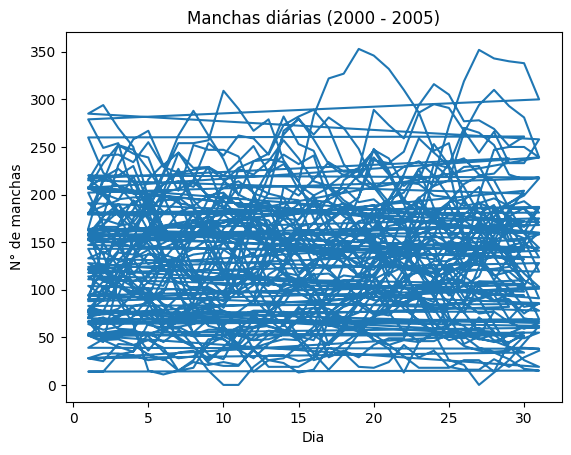

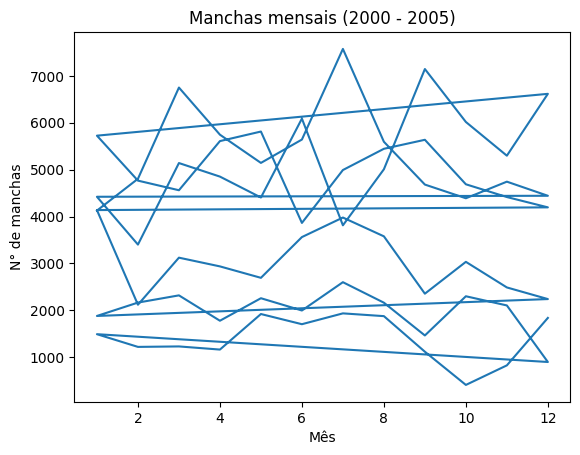

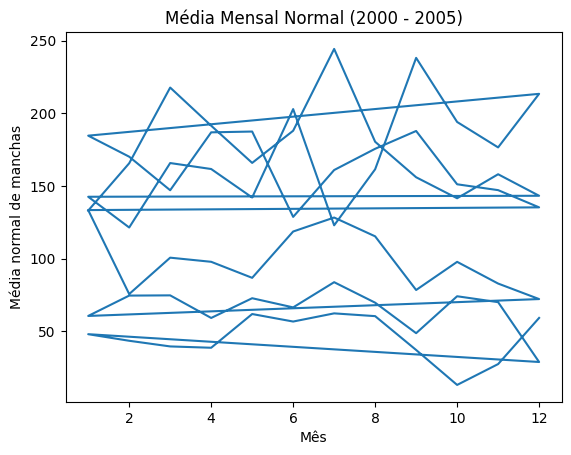

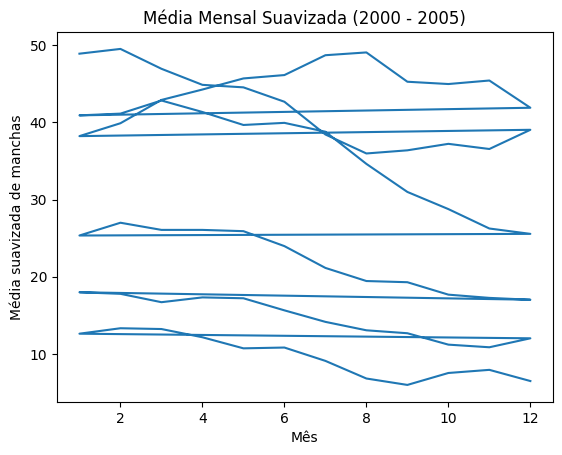

<Figure size 640x480 with 0 Axes>

In [25]:
gera_graficos(2000, 2005)

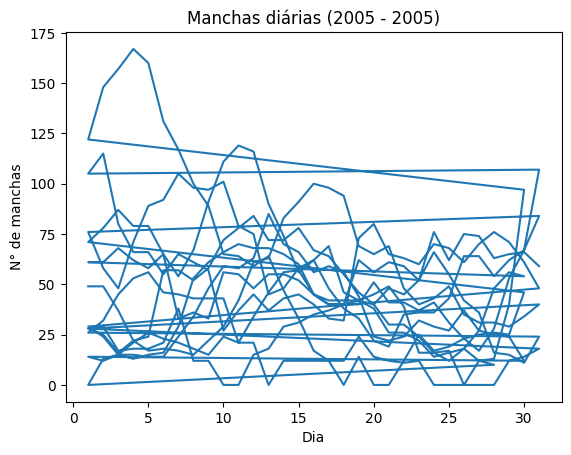

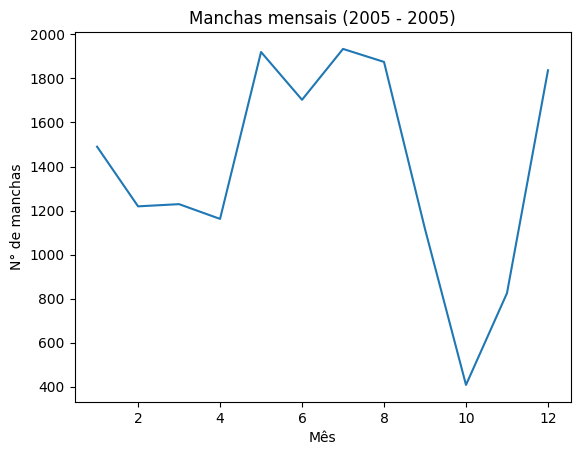

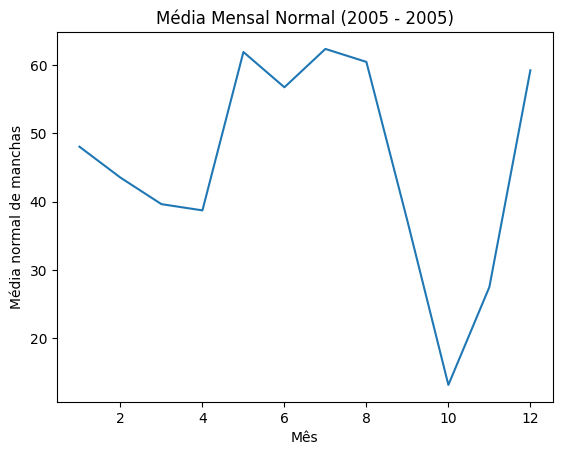

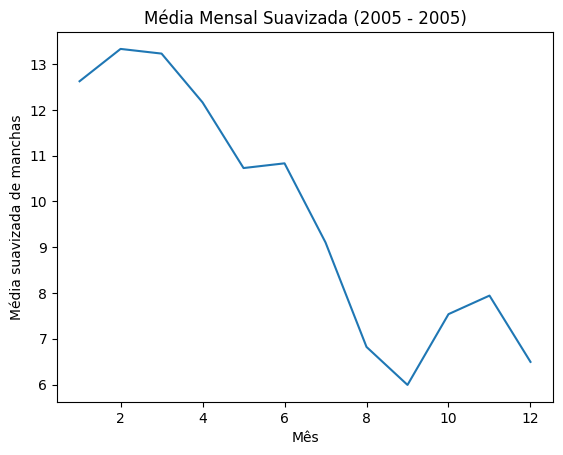

<Figure size 640x480 with 0 Axes>

In [26]:
gera_graficos(2005, 2005)

#### Função menu()

Aqui está a alma do programa, com todas as funções juntas e formando sua parte interativa com o usuário, usando de tratamento de entrada.

In [27]:
def menu() -> None:
    """
    Essa função define a interface de usuário.
    
    :return: 
    """
    
    print('='*137)
    print('Trabalho Prático A - Programação de computadores'.center(138))
    print('MANCHAS SOLARES'.center(138)) 
    print('Por Gabriel Ribeiro - TM, UFMG - 2023'.center(138)) 
    print('='*137)
    
    print('>>> Base de dados: https://www.sidc.be/SILSO/datafiles (Total Sunspot Number)')
    print('-'*137)
    
    fechar = False
    while not fechar:
        
        '''print('\nOlá! Bem vindo ao programa de análise de manchas solares. Digite o número correspondente de como deseja prosseguir:\n'
                  '> 1) Contar quantos dias não houveram manchas solares para um dado ano.\n'
                  '> 2) Ver qual mês e ano tiveram mais manchas solares.\n'
                  '> 3) Ver qual mês e ano tiveram menos manchas solares.\n'
                  '> 4) Analisar máximos e mínimos de um dado período.\n'
                  '> 5) Calcular a média mensal normal para um dado ano.\n'
                  '> 6) Gerar gráficos para um dado período.\n'
                  '> 7) FECHAR / ENCERRAR.\n')'''
        
        opcao = input('\nOlá! Bem vindo ao programa de análise de manchas solares. Digite o número correspondente de como deseja prosseguir:\n'
                  '> 1) Contar quantos dias não houveram manchas solares para um dado ano.\n'
                  '> 2) Ver qual mês e ano tiveram mais manchas solares.\n'
                  '> 3) Ver qual mês e ano tiveram menos manchas solares.\n'
                  '> 4) Analisar máximos e mínimos de um dado período.\n'
                  '> 5) Calcular a média mensal normal para um dado ano.\n'
                  '> 6) Gerar gráficos para um dado período.\n'
                  '> 7) FECHAR / ENCERRAR.\n'
                      '>>>> INSIRA O NÚMERO CORRESPONDENTE À SUA ESCOLHA: ')
        
        
        while opcao not in [str(i) for i in range(1, 8)]:
            opcao = input('\nERRO: Opção inválida. Você digitou uma opção que não existe.\n'
                          '>>>> INSIRA UMA OPÇÃO VÁLIDA: ')        
        
        if opcao == '1':
            
            print('\n>>>> CONTADOR DE DIAS SEM MANCHAS SOLARES:\n')
            ano = input('-Insira o ano (yyyy - entre 1818 e 2023) para o qual você quer realizar a contagem: ')
            
            ano = verificacao_de_data(ano, tipo='yyyy', intervalo_limite_inicio='01/01/1818', intervalo_limite_fim='31/10/2023')
            
            dias_sem_manchas(int(ano))
            
        elif opcao == '2':
            print('>>>> MÊS E ANO COM MAIS MANCHAS SOLARES.')
            mes_ano_mais_manchas()
            
        elif opcao == '3':
            print('>>>> MÊS E ANO MAIS SEM MANCHAS SOLARES.')
            mes_ano_mais_sem_manchas()
            
        elif opcao == '4':
            print('>>>> MÁXIMO E MÍNIMO PARA PERÍODO.\n')
            inicio = input('Insira uma data (dd/mm/yyyy) entre 1818 e 2023 como início do período: ')
            inicio = verificacao_de_data(inicio, 'dd/mm/yyyy', '01/01/1818', '31/10/2023')
        
            final = input('Insira uma data (dd/mm/yyyy) entre 1818 e 2023 como final do período: ')
            final = verificacao_de_data(final, 'dd/mm/yyyy', '01/01/1818', '31/10/2023')
            
            max_min_periodo(inicio, final)
            
        elif opcao == '5':
            print('>>>> MÉDIA DE MANCHAS PARA UM DADO ANO.\n')
            ano = input('-Insira um ano entre 1818 e 2023 para calcular suas médias de manchas solares.')
            ano = verificacao_de_data(ano, 'yyyy', '01/01/1818', '31/10/2023')
            
            medias = media_mensal(ano)
            
            print(f'ANO: {ano}')
            print('MÊS | MÉDIA')
            for tupla in medias:
                print((f' {tupla[1]} ' if tupla[1] >= 10 else f' 0{tupla[1]} ')+ f'| {tupla[2]}')
            
        elif opcao == '6':
            continuar = True
            while continuar:
                print('>>>> GERAR GRÁFICOS.\n')
                inicio = input('Insira um ano (yyyy) entre 1818 e 2023 como início do período: ')
                inicio = verificacao_de_data(inicio, 'yyyy', '01/01/1818', '31/10/2023')
            
                final = input('Insira um ano (yyyy) entre 1818 e 2023 como final do período: ')
                final = verificacao_de_data(final, 'yyyy', '01/01/1818', '31/10/2023')
            
                if datetime.datetime(int(final), 1, 1) <= datetime.datetime(int(inicio), 1, 1):
                    
                    recomecar  = input('ERRO: O ano final vem antes do ano inicial. Recomeçar? [S/N]: ')
                    while recomecar not in ['s', 'n', 'S', 'N']:
                        recomecar  = input('ERRO: Entrada inválida. Deseja recomeçar a função anterior? [S/N]: ')
                        
                    if recomecar.lower() == 's':
                        continue
                    else:
                        continuar = False
                
                else:
                    gera_graficos(int(inicio), int(final))
                    continuar = False
            
        elif opcao == '7':
            print('>>>> ENCERRANDO EXECUÇÃO...\n')
            fechar = True
            break
            
        print('/'*137)
        
        continuar = input('Você gostaria realizar outra análise? [S/N]')
        while continuar not in ['S', 's', 'N', 'n']:
            continuar = input('ERRo: Entrada inválida. Você gostaria de realizar outra análise? [S/N] ')
            
        if continuar.lower() == 'n':
            fechar = True
            
    return None

# Divirta-se!

In [28]:
menu()

                                             Trabalho Prático A - Programação de computadores                                             
                                                             MANCHAS SOLARES                                                              
                                                  Por Gabriel Ribeiro - TM, UFMG - 2023                                                   
>>> Base de dados: https://www.sidc.be/SILSO/datafiles (Total Sunspot Number)
-----------------------------------------------------------------------------------------------------------------------------------------
>>>> MÁXIMO E MÍNIMO PARA PERÍODO.
O ano com mais manchas solares, entre 10/05/2000 e 14/02/2004, foi: 2001, com um total de 62199. O mês com mais manchas solares foi: 7/2000, com um total de 7574. O dia com mais manchas solares, entre 10/05/2000 e 14/02/2004, foi: 19/7/2000, com um total de 353.   O dia com menos manchas solares, entre 10/05/2000 e 14/02/2004, foi